# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [5]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### Exploratory Data Analysis

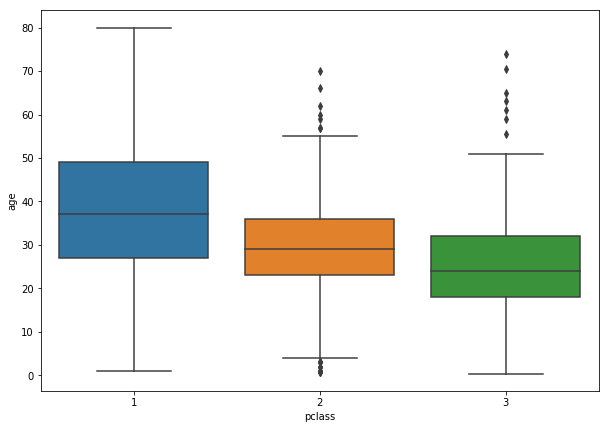

In [6]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=df)

In [7]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [8]:
df['age'] = df[['age','pclass']].apply(impute_age, axis=1)

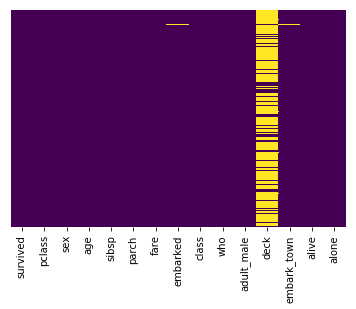

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop('deck', axis=1, inplace=True)

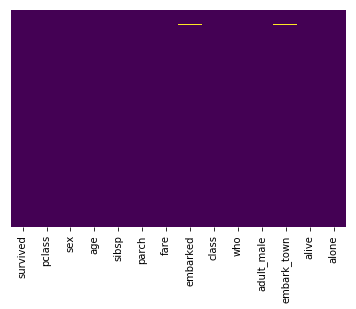

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.dropna(inplace=True)

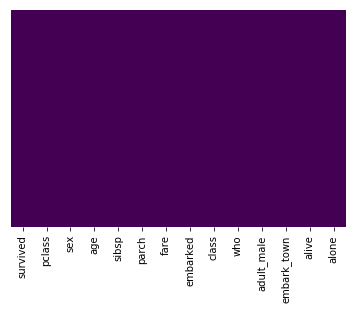

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
df['pclass'].value_counts()

3    491
1    214
2    184
Name: pclass, dtype: int64

In [17]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

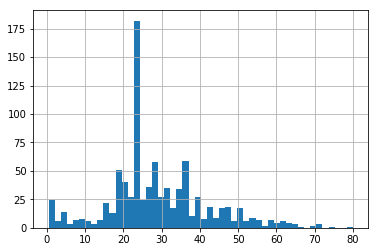

In [19]:
df['age'].hist(bins=50)

## Data Pre-processing

In [20]:
X = df[['pclass', 'sex', 'age']]

In [21]:
X['sex'] = pd.get_dummies(df['sex'],drop_first=True)
X.head(2)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pclass,sex,age
0,3,1,22.0
1,1,0,38.0


In [22]:
X.shape

(889, 3)

In [23]:
X.describe()

,pclass,sex,age
count,889.000000,889.000000,889.000000
mean,2.311586,0.649044,29.019314
std,0.834700,0.477538,13.209814
min,1.000000,0.000000,0.420000
25%,2.000000,0.000000,22.000000
50%,3.000000,1.000000,26.000000
75%,3.000000,1.000000,36.500000
max,3.000000,1.000000,80.000000


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 3 columns):
pclass    889 non-null int64
sex       889 non-null uint8
age       889 non-null float64
dtypes: float64(1), int64(1), uint8(1)
memory usage: 21.7 KB


In [25]:
y = df['survived']

In [26]:
y.value_counts()

0    549
1    340
Name: survived, dtype: int64

# Fit Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

## Decision Tree

In [32]:
clf = DecisionTreeClassifier(random_state=42)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [34]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8810

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.96      0.91       382
          1       0.92      0.76      0.83       240

avg / total       0.88      0.88      0.88       622


Confusion Matrix: 
 [[365  17]
 [ 57 183]]

Average Accuracy: 	 0.8070
Accuracy SD: 		 0.0342


In [35]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.8202

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       167
          1       0.82      0.67      0.74       100

avg / total       0.82      0.82      0.82       267


Confusion Matrix: 
 [[152  15]
 [ 33  67]]



### Bagging (oob_score=False)
** http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html**

In [36]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [38]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8810

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.93      0.91       382
          1       0.87      0.81      0.84       240

avg / total       0.88      0.88      0.88       622


Confusion Matrix: 
 [[354  28]
 [ 46 194]]

Average Accuracy: 	 0.8086
Accuracy SD: 		 0.0336


In [39]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8015

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.87      0.85       167
          1       0.76      0.69      0.72       100

avg / total       0.80      0.80      0.80       267


Confusion Matrix: 
 [[145  22]
 [ 31  69]]



### Bagging(oob_score=True)
Use out-of-bag samples to estimate the generalization accuracy

In [40]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42, oob_score=True)

In [41]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [42]:
bag_clf.oob_score_

0.8038585209003215

In [43]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8810

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.93      0.91       382
          1       0.87      0.81      0.84       240

avg / total       0.88      0.88      0.88       622


Confusion Matrix: 
 [[354  28]
 [ 46 194]]

Average Accuracy: 	 0.8086
Accuracy SD: 		 0.0336


In [44]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8015

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.87      0.85       167
          1       0.76      0.69      0.72       100

avg / total       0.80      0.80      0.80       267


Confusion Matrix: 
 [[145  22]
 [ 31  69]]

